In [2]:
# 必要なライブラリを読込
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

import chainer
import chainer.functions as F           # パラメータを含まない関数を収録したパッケージ
import chainer.links as L               # パラメータを含む関数を収録したパッケージ
from chainer import computational_graph # グラフを出力するパッケージ
from chainer import serializers         # モデルの保存や読込を行うパッケージ

In [8]:
# MNISTデータをロード
# notebookが保存されているディレクトリにダウンロードされます
from sklearn.datasets import fetch_mldata

In [13]:
mnist = fetch_mldata('MNIST original', data_home='.')

In [14]:
# 画像データの確認
X = mnist.data
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [15]:
y = mnist.target
y

array([0., 0., 0., ..., 9., 9., 9.])

In [19]:
X = X.astype(np.float32)
y = y.astype(np.int32)

In [18]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
y

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [23]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [24]:
X /= 255

In [26]:
# データを画像として出力する関数
def draw_digit(data):
    """数値の行列データを画像表示"""
    plt.figure(figsize=(3, 3))
    X, Y = np.meshgrid(range(28),range(28))
    Z = data.reshape(28, 28)
    Z = Z[::-1,:]
    plt.pcolor(X, Y, Z)
    plt.tick_params(labelbottom="off")
    plt.tick_params(labelleft="off")
    plt.gray()
    plt.show()

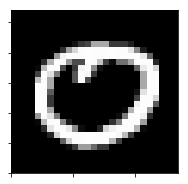

In [39]:
draw_digit(X[873])

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [41]:
N_train = len(X_train)
N_train

49000

In [42]:
N_test = len(X_test)

In [59]:
class MLP(chainer.Chain):
    def __init__(self):
        super(MLP, self).__init__()
        with self.init_scope():
            self.l1=L.Linear(784, 900)
            self.l2=L.Linear(900, 1000)
            self.l3=L.Linear(1000, 500)
            self.l4=L.Linear(500, 10)
    def __call__(self, X):
        h1 = F.relu(self.l1(X))
        h2 = F.relu(self.l2(h1))  
        h3 = F.relu(self.l3(h2))
        return self.l4(h3)

In [43]:
?with

Object `with` not found.


In [60]:
MLP()

In [88]:
model = L.Classifier(MLP())

In [89]:
gpu = -1

In [ ]:
if gpu >= 0:
    

In [90]:
optimizer = chainer.optimizers.SGD()
optimizer.setup(model)

In [91]:
from chainer.datasets import tuple_dataset
from chainer import iterators, training
from chainer.training import extensions

In [92]:
train = tuple_dataset.TupleDataset(X_train, y_train)

In [93]:
batch_size = 100
n_epoch = 20

In [94]:
train_iter = iterators.SerialIterator(train, batch_size=batch_size, shuffle=True)

In [95]:
updater = training.StandardUpdater(train_iter, optimizer, device=gpu)

In [96]:
trainer = training.Trainer(updater, (n_epoch, 'epoch'), out='result')

In [97]:
test = tuple_dataset.TupleDataset(X_test, y_test)

In [98]:
test_iter = updater = training.StandardUpdater(train_iter, optimizer, device=-1)

In [99]:
trainer = training.Trainer(updater, (n_epoch,'epoch'), out='result')

In [100]:
test = tuple_dataset.TupleDataset(X_test, y_test)

In [101]:
test_iter = iterators.SerialIterator(test, batch_size=batch_size, shuffle=False, repeat=False)

In [102]:
trainer.extend(extensions.Evaluator(test_iter, model))

In [103]:
trainer.extend(extensions.LogReport())

In [104]:
trainer.extend(extensions.PrintReport(['epoch', 'main/loss', 'main/accuracy', 'validation/main/loss', 'validation/main/accuracy']))

In [105]:
trainer.extend(extensions.PlotReport(['main/accuracy', 'validation/main/accuracy'],
                                    'epoch', file_name='accuracy.png'))
trainer.extend(extensions.PlotReport(['main/loss', 'validation/main/loss'],
                                    'epoch', file_name='loss.png'))

In [106]:
trainer.run()

epoch       main/loss   main/accuracy  validation/main/loss  validation/main/accuracy
1           1.27671     0.733531       0.563699              0.855571                  
2           0.440971    0.884327       0.367052              0.897857                  
3           0.33498     0.907265       0.312995              0.911476                  
4           0.291672    0.917551       0.282134              0.918762                  
5           0.263797    0.925041       0.260146              0.925952                  
6           0.242322    0.931102       0.241009              0.930238                  
7           0.224818    0.936082       0.229313              0.934                     
8           0.209716    0.940796       0.213651              0.937524                  
9           0.196231    0.945082       0.204718              0.940476                  
10          0.183956    0.947857       0.193242              0.942857                  
11          0.172875    0.951265  

In [107]:
# ReportPlotによるグラフを出力する関数
from pylab import box
def show_graph(src):
    img =  plt.imread(src)
    xpixels,ypixels = img.shape[0],img.shape[1]
    dpi = 100
    margin = 0.01
    figsize = (1 + margin) * ypixels / dpi, (1 + margin) * xpixels / dpi

    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])
    ax.tick_params(labelbottom="off",bottom="off")
    ax.tick_params(labelleft="off",left="off")

    ax.imshow(img, interpolation='none')
    box("off")
    plt.show()

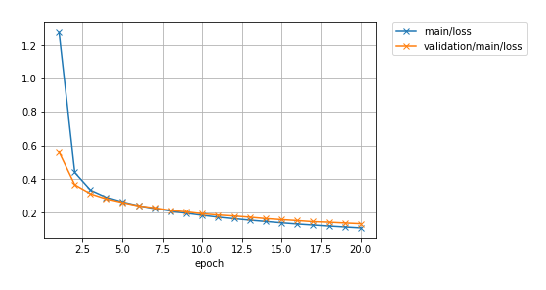

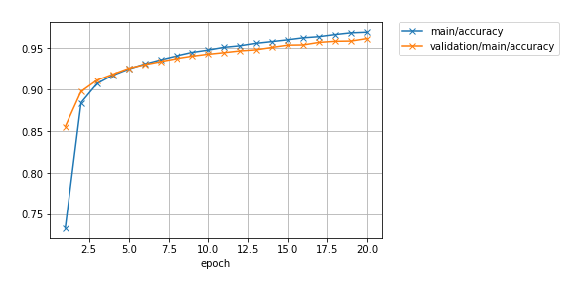

In [108]:
# 誤差と精度のグラフを描画
show_graph('result/loss.png')
show_graph('result/accuracy.png')

In [154]:
def predict(model, X):
    if len(X.shape) == 1:
        pred = model.predictor(X[None, ...]).data.argmax()
    else:
        pred = model.predictor(X).data.argmax(axis=1)
    return pred

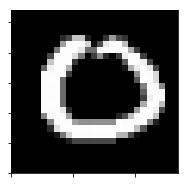

In [155]:
index = 12
draw_digit(X_test[index])

In [156]:
pred = predict(model, X_test[index])
ans = y_test[index]
print(pred, ans)

0 0


In [157]:
X = np.array([[1,2,3,4,5], [6,7,8,9,0]])
X[None, ...]

array([[[1, 2, 3, 4, 5],
        [6, 7, 8, 9, 0]]])

In [158]:
from sklearn.metrics import confusion_matrix as cm
result = predict(model, X_test)
cm(result, y_test)

array([[1969,    0,    7,    0,    2,   13,   17,    4,    6,   11],
       [   0, 2363,    8,    3,    4,    0,    5,    8,   19,    6],
       [   4,   16, 1973,   26,    5,    5,    3,   18,    7,    6],
       [   0,    7,   10, 1976,    0,   19,    0,    6,   28,   21],
       [   2,    3,    8,    0, 2000,    6,   11,    8,    4,   35],
       [   5,    1,    2,   32,    1, 1828,   16,    3,   13,   11],
       [  10,    2,    4,    1,   15,   15, 2017,    0,    9,    1],
       [   4,    2,   16,   10,    6,    4,    2, 2118,    4,   31],
       [  11,   16,   14,   22,    4,   17,    7,    5, 1995,   13],
       [   3,    2,    3,   12,   41,   13,    0,   21,    8, 1958]])

In [161]:
xp = np

In [162]:
# 混同行列をグラフで出力する関数
def plot_cm(y_true, y_pred):
    confmat = cm(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xticks(xp.arange(0, 10, 1)) # x軸の目盛りを指定
    plt.yticks(xp.arange(0, 10, 1)) # y軸の目盛りを指定
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.show()

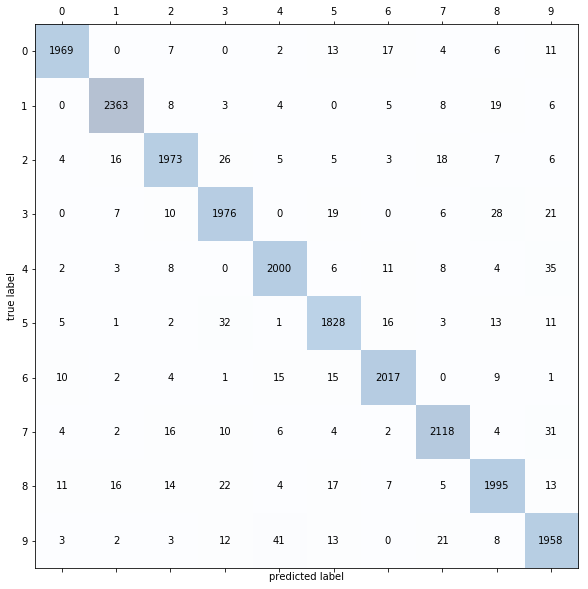

In [163]:
# 混同行列をグラフで出力
# testデータに対して行うことに注意
plot_cm(result, y_test)

In [164]:
# 性能指標を確認
from sklearn import metrics
print('accuracy: %.3f' % metrics.accuracy_score(y_test, predict(model, X_test)))
print('recall: %.3f' % metrics.recall_score(y_test, predict(model, X_test), average='macro'))
print('precision: %.3f' % metrics.precision_score(y_test, predict(model, X_test), average='macro'))
print('f1_score: %.3f' % metrics.f1_score(y_test, predict(model, X_test), average='macro'))

accuracy: 0.962
recall: 0.961
precision: 0.961
f1_score: 0.961


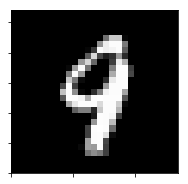

正解：9  予測：4


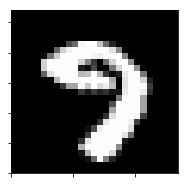

正解：9  予測：7


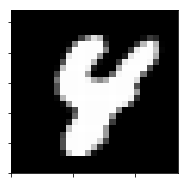

正解：4  予測：8


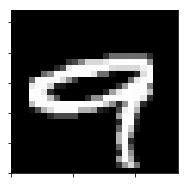

正解：9  予測：7


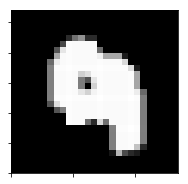

正解：9  予測：4


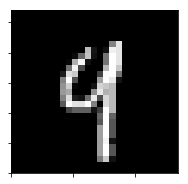

正解：4  予測：9


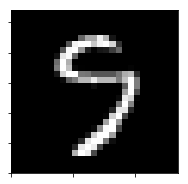

正解：9  予測：5


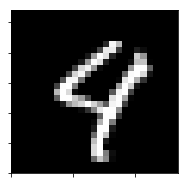

正解：4  予測：9


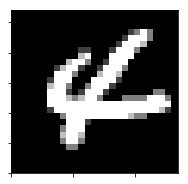

正解：4  予測：6


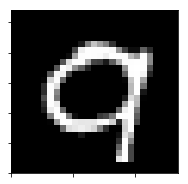

正解：9  予測：0


In [166]:
# 予想が外れたデータを表示
# 今回は3つだけ表示
count = 0
for i in range(len(y_test)):
    pre = predict(model, X_test[i]) # 予測結果
    ans =  y_test[i]                # 正解
    
    # 正解が4か9のサンプルについてだけ確認
    if (ans != 9) and (ans != 4):
        continue
        
    # 予測が間違っていたらリストへ格納
    if pre != ans:
        count += 1
        # 予測を間違えた画像を3枚だけ表示
        if count > 10:
            break
        draw_digit(X_test[i])
        print("正解：{}  予測：{}".format(ans, pre))

In [183]:
serializers.save_npz('mnist.model.npz', model)
print('Saved the model.')

Saved the model.


In [184]:
# モデルの読込
# (ファイル名, 読み込みたいモデルに与える変数名)
serializers.load_npz('mnist.model', model_reloaded)
print('Loaded the model.')

NameError: name 'model_reloaded' is not defined

In [185]:
model_reloaded

NameError: name 'model_reloaded' is not defined

In [178]:
model